# 11. Η βιβλιοθήκη numpy

Η ενότητα αποτελεί μια σύντομη εισαγωγή στην βιβλιοθήκη [numpy](https://numpy.org/) η οποία χρησιμοποιείται για αριθμητική ανάλυση, αριθμητική λύση γραμμικών συστημάτων και επεξεργασία πολυδιάστατων πινάκων. Περισσότερες λεπτομέρειες για την βιβλιοθήκε παρέχονται [εδώ](https://numpy.org/doc/stable/user/whatisnumpy.html). Η θεμέλια δομή της βιβλιοθήκης είναι το ndarray δηλαδή ο πολυδιάστατος πίνακας. Είναι πολύ χρήσιμη στην επεξεργασία δεδομένων γιατί η πλειοψηφία των βιβλιοθηκών που διαχειρίζονται δορυφορικές εικόνες επιστρέφουν αντικείμενα _numpy ndarrays_.

## Ειδική ενότητα για εκτέλεση στο Google Colab

In [1]:
# έλεγχος αν το notebook τρέχει στο google colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
# αν το notebook τρέχει στο colab, mount το Google Drive και αλλαγή στο directory που έχει γίνει clone το github repository.
# εγκατάσταση απαραίτητων βιβλιοθηκών
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/Colab\ Notebooks/programming/notebooks
    !pip install rasterio matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from pathlib import Path 

Ας φτιάξουμε έναν πρώτο πίνακα. Ακόμα και τα διανύσματα θα τα θεωρήσουμε σαν έναν πίνακα με μια στήλη. 
Τα στοιχεία ενός πίνακα πρέπει να είναι του ίδιου τύπου (είτε _integer_ είτε _float_ είτε _boolean_).

In [4]:
x=np.array([1,2,3,4])
print(x)

[1 2 3 4]


Για τον πίνακα αυτό μπορούμε να ανακτήσουμε μια σειρά ιδιοτήτων

Καταρχήν ας δούμε τι τύπος δεδομένων είναι ο πίνακας αυτός:

In [5]:
type(x)

numpy.ndarray

Ποιές είναι οι διαστάσεις του πίνακα;

In [6]:
print(x.shape)

(4,)


Και πόσες είναι οι διαστάσεις:

In [7]:
print(x.ndim)

1


Με την παρακάτω εντολή μπορούμε να ανακτήσουμε το μέγεθός του:

In [8]:
print(x.size)

4


Από τι τύπο δεδομένων αποτελούνται τα στοιχεία του:

In [9]:
print(x.dtype)

int64


Και πόση μνήμη καταλαμβάνει σε bytes:

In [10]:
print(x.nbytes)

32


Ο επόμενος πίνακας έχει 4 γραμμές και 1 στήλη. 

In [11]:
y=np.array([[1],[2],[3],[4]])
print(y.shape)

(4, 1)


Αν ελέγξουμε το πλήθος των διαστάσεων του, θα διαπιστώσουμε ότι έχει 2:

In [12]:
print(y.ndim)

2


Άρα ο πίνακας $x$ είναι μονοδιάστατος και ο πίνακας $y$ διάστατος. Ας επαναλάβουμε τον τρόπο σύνταξης. Δώστε προσοχή στην σύνταξη σε σχέση με τον αρχικό ορισμό που δώσαμε για τον πίνακα $x$ σε σχέση με τον τρέχοντα πίνακα $y$.

In [13]:
x=np.array([1,2,3,4])
y=np.array([[1],[2],[3],[4]])

print(f'Διαστάσεις για τον πίνακα x: {x.ndim}\nΔιαστάσεις για τον πίνακα y: {y.ndim}')

Διαστάσεις για τον πίνακα x: 1
Διαστάσεις για τον πίνακα y: 2


Μπορούμε να δημιουργήσουμε ένα numpy array μέσω μιας λίστα python:

In [14]:
l = [2, 25, 8, 1]
arr = np.asarray(l)
print(type(arr))


<class 'numpy.ndarray'>


Όπως είδαμε μέσω της εντολής `x.dtype` τα στοιχεία του πίνακα είναι ακέραιοι αριθμού (int64). 
Αν κατά την δημιουργία έστω και ένας αριθμός ήταν δεκαδικός (float), τότε όλα τα στοιχεία του πίνακα μετατρέπονται σε float.


In [15]:
x=np.array([1,2,3,4.5])
print(x.dtype)

float64

Μπορούμε ρητά να μετατρέψουμε τον τύπο δεδομένων των στοιχείων ένος πίνακα π.χ. από ακέραιο σε δεκαδικό

In [16]:
x=np.array([1,2,3,4])
print(x.dtype)

int64


In [17]:
x=x.astype(float)
print(x.dtype)

float64


**Προσοχή** στην απώλεια δεδομένων κατά την μετατροπή από ακέραιο σε δεκαδικό. Η παρακάτω μετατροπή οδηγεί σε στρογγυλοποιήσεις


In [18]:
x=np.array([1,2,3,4.5])
x=x.astype(int)
print(x)

[1 2 3 4]


Επίσης κατά την δημιουργία μπορούμε να ορίσουμε τον τύπο δεδομένων των στοιχείων:

In [19]:
x = np.array([[1,2,3],[4,5,6]], dtype = float)
print(x.dtype)

float64


Ανάλογα τον τύπο των στοιχείων αλλάζει και το μέγεθος. Αυτό μπορεί να δημιουργήσει προβλήματα μνήμης σε πολύ μεγάλα ndarrays π.χ σε μια πολυφασματική δορυφορική υψηλής ανάλυσης και μεγάλης έκτασης.
    

In [20]:
x = np.array([[1,2,3],[4,5,6]], dtype = np.uint32)
print(x.nbytes)

24


In [21]:
print(x.astype(float).nbytes)


48


Μπορούμε να δημιουργήσουμε ένα ndarray το οποίο θα περιλαμβάνει μόνο την τιμή 1 στα στοιχεία του μέσω της συνάρτησης `np.ones`. Η παραπάνω εκτέλεση επιστρέφει float data type.

In [22]:
np.ones(5) 

array([1., 1., 1., 1., 1.])

Μπορούμε ρητά να ορίσουμε τον τύπο δεδομένων στην συνάρτηση `np.ones`.

In [23]:
np.ones(5, dtype=int)

array([1, 1, 1, 1, 1])

ή να είναι πολυδιάστατος πίνακας με στοιχεία με τιμές 1:

In [24]:
np.ones((5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

Αντίστοιχα μπορούμε να δημιουργήσουμε ένα array που να περιλαμβάνει στοιχεία μόνο με *0*.

In [25]:
np.zeros((3,3),dtype=int)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

## Πράξεις μεταξύ array

Πρόσθεση

In [26]:
x=np.array([[1,2],[3,4], [5,6]])
y=np.array([[1,1],[1,1], [2,2]])
v=x+y
print(v)

[[2 3]
 [4 5]
 [7 8]]


Αντιστοιχα μπορούμε να προσθέσουμε το array με έναν μόνο ακέραιο:


In [27]:
x=x+1
print(x)

[[2 3]
 [4 5]
 [6 7]]


Αφαίρεση

In [28]:
x=np.array([[1,2],[3,4], [5,6]])
y=np.array([[1,1],[1,1], [2,2]])
v=x-y
print(v)

[[0 1]
 [2 3]
 [3 4]]


Πολλαπλασιασμός. Σε αυτήν την περίπτωση χρησιμοποιείται η συνάρτηση `dot` και όχι το σύμβολο `*`:
Μπορούμε να πολλαπλασιάσουμε ένα πίνακα με έναν αριθμό:


In [29]:
x=np.array([[1,2],[3,4],[5,6]])
v=np.dot(x,2.5,out=None)
print(v)



[[ 2.5  5. ]
 [ 7.5 10. ]
 [12.5 15. ]]


ή με έναν άλλο πίνακα. Σε αυτήν την περίπτωση το γινόμενο $x⋅y$ δύο πινάκων $x,y$ 
ορίζεται μόνο όταν αριθμός των γραμμών του ενός πίνακα ισούται με τον αριθμό των στηλών του άλλου. Όπως παρατηρείτε στις επόμενες γραμμές κώδικα καλούμε την ιδιότητα `T` του πίνακα $y$ για να κάνουμε αντιμετάθεση τις γραμμές με τις στήλες του (*ανάστροφος* πίνακας) και να πληρείται αυτή η συνθήκη.

In [30]:
y=np.array([[1,1],[1,1],[2,2]])
v=np.dot(x,y.T,out=None)
print(v)

[[ 3  3  6]
 [ 7  7 14]
 [11 11 22]]


Διαίρεση πινάκών:

In [31]:
v = x/y
print(v)

[[1.  2. ]
 [3.  4. ]
 [2.5 3. ]]


Μπορούμε να φτιάξουμε μια ακολουθία τιμών σε έναν πίνακα numpy:np.arange(start=1, stop=10, step=3)

In [32]:
x = np.arange(start=1, stop=10, step=2) # η πιο απλά  np.arange(1, 10, 2) 
print(x)

[1 3 5 7 9]


Με την συνάρτηση `reshape` μπορούμε να αλλάξουμε τις διαστάσεις ενός πίνακα

In [33]:

x = np.arange(6)
print(x.shape)

(6,)


In [34]:
x = x.reshape(2,3)
print(x.shape)


(2, 3)


Επιπλεόν μπορούμε με εύκολο τρόπο να υπολογίσουμε στατιστικά μέτρα θέσης και μεταβλητότητας ενός πίνακα ndarray.

Ας δημιουργήσουμε ένα πίνακα με ακέραιους διαστάσεων:

In [35]:
np.random.rand(2023)
myarray= np.random.randint(1,11, size=(4,3))
print(myarray)

[[ 3 10  4]
 [ 3  4  2]
 [ 3 10  2]
 [ 4  6  9]]


Αν καλέσουμε τη παραπάνω εντολή θα πάρουμε το άθροισμα για τα στοιχεία που περιέχονται στο array.

In [36]:
np.sum(myarray)

60

Αν ορίσουμε την παράμετρο `axis=0` θα πάρουμε το άθροισμα για τις στήλες αν `axis=1` το άθροισμα για τις γραμμές.

In [37]:
np.sum(myarray, axis=0) # άθροισμα για τις στήλες, άξονας x

array([13, 30, 17])

In [38]:
np.sum(myarray, axis=1) # άθροισμα για τις γραμμές, άξονας y

array([17,  9, 15, 19])

Αντίστοιχα μπορούμε να χρησιμοποιήσουμε και άλλες συναρτήσεις:

In [39]:
np.amin(myarray)

2

In [40]:
np.amax(myarray, axis=0) # max κατά στήλη

array([ 4, 10,  9])

Αντί για συναρτήσεις μπορούμε να χρησιμοποιήσουμε μεθόδους από τα numpy objects που εκτελούν την αντίστοιχη λειτουργία, π.χ. για το max

In [41]:
myarray.max(axis=0)

array([ 4, 10,  9])

Και αντίστοιχα να πάρουμε και άλλα μέτρα όπως:

In [42]:
# μέσο όρο
np.mean(myarray)

5.0

In [43]:
# διάμεσο
np.median(myarray)

4.0

In [44]:
# τυπική απόκλιση
np.std(myarray)

2.886751345948129

In [45]:
np.percentile(myarray,25) # 25th percentile

3.0

In [46]:
np.percentile(myarray,75) # 75th percentile

6.75

In [47]:
np.percentile(myarray,50) # 50th percentile or median

4.0

Σε αρκετές περιπτώσεις στα στοιχεία ενός πίνακας μπορεί να εχουν την τιμή *NaN* που σημαίνει "*Not a number*". Η τιμή του *Nan* χρησιμοποιείται όταν δεν υπάρχουν δεδομένα (missing values). Χαρακτηριστικό παράδειγμα είναι όταν διαβάζουμε μια δορυφορική εικόνα και κάνουμε flag ως NaN τα pixels που εχουν νεφοκάλυψη για να τα αποκλείσουμε από την ανάλυση. Και γενικότερα όταν θέλουμε να εξαιρέσουμε τιμές ή στοιχεία από μαθηματικές πράξεις μπορούμε να τα θέσουμε ως *NaN*. Προσοχή, το *NaN* δεν ισούται με 0.
Να σημειωθεί ότι σε ένα array που περιέχει *NaN* στοιχεία πολλές από τις συναρτήσεις που προαναφέρθηκαν για τον υπολογισμό στατιστικών μέτρων επιστρέφουν *NaN*. Στην περίπτωση αυτή χρησιμοποιούνται παραλλαγές των συναρτήσεων (π.χ. `nansum` αντί `sum`). Για παράδειγμα έστω το παραπάνω array που περιέχει *NaN* στοιχεία μεταξύ των άλλων,

In [48]:
myarray=myarray.astype(float) #μετατροπη σε float (ακέραιο τύπο δεδομένων), αναγκαίο για να θέσουμε κάποια στοιχέια σε NaN
myarray[myarray<=4] = np.NaN # ορισμό σε NaN για όσες τιμές είναι <=4
myarray

array([[nan, 10., nan],
       [nan, nan, nan],
       [nan, 10., nan],
       [nan,  6.,  9.]])

In [49]:
np.sum(myarray)

nan

In [50]:
np.nansum(myarray)

35.0

In [51]:
np.mean(myarray)

nan

In [52]:
np.nanmean(myarray)

8.75

Ανάλογη λειτουργία έχει και το module `numpy.ma` που χρησιμοποιείται για να κάνουμε mask τα στοιχεία ενός array. Δηλαδή όταν ορίσουμε κάποια στοιχεία σαν masked αυτά εξαιρούνται από τον υπολογισμό και τις διάφορες πράξεις που εκτελούνται στο array. Διαβάστε περισσότερα για τα mask arrays [εδώ](https://numpy.org/doc/stable/reference/maskedarray.html).

In [53]:
import numpy.ma as ma #εισαγωγή της απαραίτητης βιβλιοθήκης

Έστω ο παρακάρω πίνακας

In [54]:
x=np.arange(6)

Μπορούμε να δημιουργήσουμε ένα masked array μέσω της συνάρτησης *masked_array*. Στην παράμετρο mask μπορούμε να επισημάνουμε ποιά στοιχεία θα είναι masked ορίζοντας την τιμή 1 1 (ή True)

In [55]:
x_masked = ma.masked_array(x, mask=[1,0,0,0,0,0])

In [56]:
print(x)

[0 1 2 3 4 5]


In [57]:
print(x_masked)

[-- 1 2 3 4 5]


In [58]:
x_masked

masked_array(data=[--, 1, 2, 3, 4, 5],
             mask=[ True, False, False, False, False, False],
       fill_value=999999)

Το masked_array έχει μια ιδιότητα που ονομάζεται fill_value και πρόκειται για μια τιμή που θα αντικαταστήσει τα masked στοιχεία όταν καλέσουμε την μέθοδο `filled()`.

In [59]:
x_masked.filled()

array([999999,      1,      2,      3,      4,      5])

Κατά την κλήση της μπορεί να οριστεί αυτή η τιμή πέρα από την προκαθορισμένη.

In [60]:
x_masked.filled(15)

array([15,  1,  2,  3,  4,  5])

Αν και το πρώτο στοιχείο το έχουμε κάνει masked, τα πραγματικά δεδομένα εξακολουθούν να υφίστανται:

In [61]:
x_masked.data

array([0, 1, 2, 3, 4, 5])

Όμως κατά τους διάφορους υπολογισμούς τα masked στοιχεία αγνοούνται π.χ. στον μέσο όρο:

In [62]:
np.mean(x_masked)

3.0

In [63]:
print(x_masked)

[-- 1 2 3 4 5]


Επιπλέον μπορούμε να χρησιμοποιήσουμε και άλλες χρήσιμες συναρτήσεις και μεθόδους στα ndarray objects.

Με τον παρακάτω τρόπο μπορούμε να εντοπίσουμε τις μοναδικές τιμές από τα στοιχεία ενός πίνακα. Έστω ο παρακάτω πίνακας

In [64]:
np.random.rand(2)
myarray= np.random.randint(1,11, size=(10,10))
myarray

array([[10,  3,  9,  8,  3,  9, 10,  1, 10,  1],
       [ 5,  1,  7,  2,  7,  7,  8,  4,  5,  6],
       [ 3,  8,  7,  5,  4,  3,  9,  4,  7,  7],
       [ 3,  8,  5,  3,  9,  7,  2,  2,  3,  6],
       [ 3,  6,  9,  4,  7,  7,  4,  9,  7,  3],
       [ 9, 10,  8,  3,  8,  2,  2,  5,  6, 10],
       [ 6,  5,  9,  6,  5,  7,  2,  5,  9,  4],
       [ 4, 10,  6,  9,  1,  7,  8,  4,  4,  3],
       [ 6,  6,  3,  6,  8,  9,  1,  6,  1,  1],
       [ 7,  8,  9, 10,  8,  3,  9,  1,  1, 10]])

In [65]:
unique, counts = np.unique(myarray, return_counts=True)
unique, counts

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 9,  6, 13,  9,  8, 11, 13, 10, 13,  8]))

Μπορούμε να μετατρέψουμε ένα πίνακα διαστάσεων $i⋅j$ σε διάνυσμα δηλ. σε πίνακα μιας μόνο στήλης με την χρήση της μεθόδου `flatten`.
Ο πίνακας myarray είναι διαστάσεων 10x10 και έχει 100 στοιχεία:

In [66]:
myarray.shape

(10, 10)

In [67]:
myarray.size

100

Καλώ την μέθοδο `flatten` και επιβεβαιώ τις διαστάσεις. Πλέον ολα τα στοιχεία είναι σε μια στήλη.

In [68]:
myarray_f = myarray.flatten()
myarray_f

array([10,  3,  9,  8,  3,  9, 10,  1, 10,  1,  5,  1,  7,  2,  7,  7,  8,
        4,  5,  6,  3,  8,  7,  5,  4,  3,  9,  4,  7,  7,  3,  8,  5,  3,
        9,  7,  2,  2,  3,  6,  3,  6,  9,  4,  7,  7,  4,  9,  7,  3,  9,
       10,  8,  3,  8,  2,  2,  5,  6, 10,  6,  5,  9,  6,  5,  7,  2,  5,
        9,  4,  4, 10,  6,  9,  1,  7,  8,  4,  4,  3,  6,  6,  3,  6,  8,
        9,  1,  6,  1,  1,  7,  8,  9, 10,  8,  3,  9,  1,  1, 10])

In [69]:
myarray_f.shape

(100,)

Σε ένα array μπορούμε να δοκιμάσουμε αν ισχύει μια συνθήκη στις τιμές της. Στην παρακάτω γραμμή κώδικα τεστάρουμε αν έστω και ένα στοιχείο περιέχει τιμές >8. Θα επιστρέψει True γιατί βλέπουμε ότι αρκετά στοιχεία έχουν την τιμή>8.


In [70]:
print(myarray)

[[10  3  9  8  3  9 10  1 10  1]
 [ 5  1  7  2  7  7  8  4  5  6]
 [ 3  8  7  5  4  3  9  4  7  7]
 [ 3  8  5  3  9  7  2  2  3  6]
 [ 3  6  9  4  7  7  4  9  7  3]
 [ 9 10  8  3  8  2  2  5  6 10]
 [ 6  5  9  6  5  7  2  5  9  4]
 [ 4 10  6  9  1  7  8  4  4  3]
 [ 6  6  3  6  8  9  1  6  1  1]
 [ 7  8  9 10  8  3  9  1  1 10]]


In [71]:
np.any(myarray > 8)

True

Αντίστοιχα μπορούμε να δοκιμάσουμε αν όλες οι τιμές ενός πίνακας πληρούν μια συνθήκη. Εδώ δοκιμάζουμε αν όλες οι τιμές του πίνακας είναι >2. Φυσικά η απάντηση είναι False γιατί υπάρχουν και τιμές <2.

In [72]:
np.all(myarray > 2)

False

Μπορούμε να κάνουμε τον αντίστοιχο έλεγχο κατά συγκεκριμένο άξονα (xaxis) δηλαδή κατά στήλη ή γραμμή. Στην επόμενη γραμμή δοκιμάζουμε σε κάθε στήλη (axis=0) αν περιλαμβάνεται έστω και μια τιμή >8. Όπως φαίνεται στην 4η και 9η στήλη δεν υπάρχει ούτε μια τιμή >8. 

In [73]:
np.any(myarray > 8, axis=0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Έχουμε την δυνατότητα να ενώσουμε δύο πίνακες με την συνάρτηση `concatenate`:

In [74]:
arr = np.array([4, 7, 12])
arr1 = np.array([5, 9, 15])

# Use concatenate() to join two arrays
con = np.concatenate((arr, arr1))
print(con)

[ 4  7 12  5  9 15]


Σε πολυ διάστατους πίνακες μπορούμε να κάνουμε την ένωση με βάση συγκεκριμένο άξονα (παράμετρος axis), δηλ. κατά γραμμή ή στήλη.

In [75]:
arr = np.arange(20).reshape(4,5)
arr1 = np.arange(30,50).reshape(4,5)
con = np.concatenate((arr, arr1), axis=1) # κατά στήλη
print(con)

[[ 0  1  2  3  4 30 31 32 33 34]
 [ 5  6  7  8  9 35 36 37 38 39]
 [10 11 12 13 14 40 41 42 43 44]
 [15 16 17 18 19 45 46 47 48 49]]


Επίσης μπορούμε να ενώσουμε δύο arrays με την χρήση των συναρτήσεων `hstack` (οριζόντια, κατά στήλη) και `vstack` (κάθετα, κατά γραμμή). Ας δούμε το παρακάτω παράδειγμα:

In [76]:
arr1 = np.arange(15).reshape(3,5)
arr2=np.arange(10).reshape(2,5)
np.vstack((arr1, arr2))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9]])

In [77]:
arr1 = np.arange(15).reshape(5,3)
arr2=np.arange(10).reshape(5,2)
np.hstack((arr1, arr2))

array([[ 0,  1,  2,  0,  1],
       [ 3,  4,  5,  2,  3],
       [ 6,  7,  8,  4,  5],
       [ 9, 10, 11,  6,  7],
       [12, 13, 14,  8,  9]])

# Indexing and Slicing

Σε μονοδιάστατα arrays η επιλογή στοιχείων γίνεται με την ίδια λογική όπως της λίστες στην Python όπου το πρώτο στοιχείο έχει το ευρετήριο `0` και το τελευταίο το ευρετήριο `n-1`.

In [78]:
np.random.rand(2)
arr1= np.random.randint(1,11, size=(10,))
fifth = arr1[5] # στοιχείο με ευρετήριο 4
last = arr1[arr1.size-1] # τελευταίο στοιχείο
print(fifth, last)

4 2


Σε πολυδιάστατους πίνακες η προσπέλαση στοιχείων γίνεται μέσω ευρετηρίων στον αντίστοιχο άξονα.

In [79]:
np.random.rand(2)
x = np.random.randint(1,11, size=(4,4))
x

array([[10,  8, 10,  5],
       [ 9,  4,  6,  3],
       [ 1,  4,  2,  7],
       [10,  2,  3,  2]])

Επιλογή των γραμμών με ευρετήριο 1 και 3 και όλες τις στήλες

In [80]:
x[1:3,:]

array([[9, 4, 6, 3],
       [1, 4, 2, 7]])

Επιλογή όλες τις γραμμες και τις στήλες με ευρετήριο 1 και 3

In [81]:
x[:,1:3]

array([[ 8, 10],
       [ 4,  6],
       [ 4,  2],
       [ 2,  3]])

Επιλογή των γραμμών και στηλών με ευρετήριο 1 και 3

In [82]:
x[1:3,1:3]

array([[4, 6],
       [4, 2]])

Επιλογή επιλεγμένων στοιχείων μέσω συγκεκριμένων ευρετηρίων. Από τις γραμμές 0,1,3 επιλέγω αντίστοιχα τα στοιχεία από τις στήλες 0,1,2

In [83]:
x[[0,1,3],[0,1,2]]

array([10,  4,  3])

Επιπλέον έχουμε την δυνατότητα να αντικαταστήσουμε τιμές σε ένα array, πχ στο array `x` μπορούμε να αντικάστήσουμε την τιμή 10 με 99

In [84]:
x[x == 10] = 99
x

array([[99,  8, 99,  5],
       [ 9,  4,  6,  3],
       [ 1,  4,  2,  7],
       [99,  2,  3,  2]])

Ή να ορίσουμε περισσότερες συνθήκες


In [85]:
x[(x<3) | (x>8)] = 99
x

array([[99,  8, 99,  5],
       [99,  4,  6,  3],
       [99,  4, 99,  7],
       [99, 99,  3, 99]])

Αυτή η δυνατότητα είναι ιδιαίτερα χρήσιμη στην τηλεπισκόπηση. Έστω ότι έχουμε μια δορυφορική εικόνα τα εικονοστοιχεία της οποίας έχουν τις παρακάτω τιμές:

In [86]:
image = np.random.uniform(low=0.5, high=10, size=(25,25))

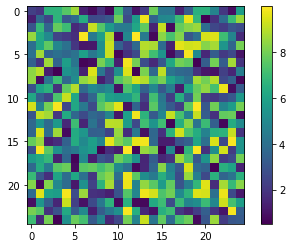

In [87]:
plt.imshow(image)
plt.colorbar()
plt.show()

Και έστω ότι έχουμε ένα άλλο αρχείο raster σε μορφή numpy ndarray το οποίο αποτελεί mask (πχ αρχείο νεφοκάλυψης). Τα στοιχεία που έχουν την τιμή *1* θα αποτελέσουν την μάσκα και τα *0* θα είναι τα έγκυρα εικονοστοιχεία. Με βάση αυτό το ndarray μπορούμε να θέσουμε ως μη έγκυρα όσα στοιχεία της image ταυτίζονται ευρετηριακά με τα στοιχεία της mask με τιμή *1*. Ας φτιάξουμε ένα υποθετικό αρχείο mask.

In [88]:
mask = np.zeros((25, 25))
mask[4:8, 4:8] = 1
mask[15:18, 12:19] = 1

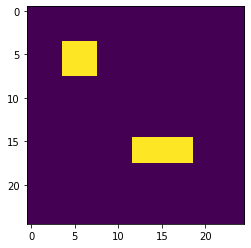

In [89]:
plt.imshow(mask)
plt.show()

In [90]:

import numpy.ma as ma
x_masked = ma.masked_array(image, mask=mask)

# ή ενναλλακτικά ορισμός των elements σε NaN τιμές
#image[mask==1]=np.nan

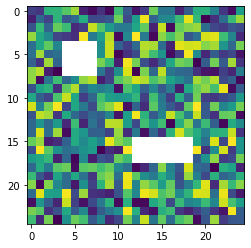

In [91]:
plt.imshow(x_masked)
plt.show()

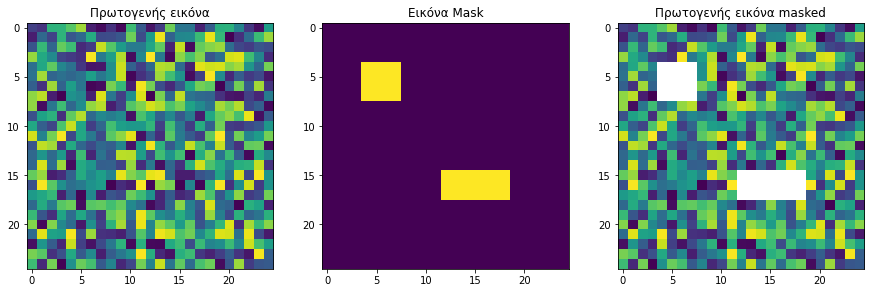

In [92]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15, 15))

ax1.imshow(image)
ax2.imshow(mask)
ax3.imshow(x_masked)

ax1.title.set_text('Πρωτογενής εικόνα')
ax2.title.set_text('Εικόνα Μask')
ax3.title.set_text('Πρωτογενής εικόνα masked')

plt.show()


Αρκετές από τις βιβλιοθήκες για ψηφιδωτά δεδομένα στην Python επιστρέφουν τα δεδομένα των αρχείων ως numpy ndarrays. Στο παράδειγμα που ακολουθεί θα χρησιμοποιηθεί η βιβλιοθήκη [rasterio](https://github.com/rasterio/rasterio) για την ανάγνωση μια πολυφασματικής δορυφορικής εικόνας.

In [93]:
INPUTDIR = Path('data')
with rio.open(INPUTDIR / 'pre_fire.tif') as src:
    image = src.read()
    print(type(image))

<class 'numpy.ndarray'>


όπως βλέπουμε η παραπάνω βιβλιοθήκη επιστρέφει ένα numpy.ndarray object όπου έχει, 3 διαστάσεις, 5 bands διαστάσεων 572x1040 η κάθε μία.



In [94]:
image.ndim,image.shape

(3, (5, 572, 1040))